In [22]:
import pandas as pd
import csv as csv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("train.csv", header=0)

In [24]:
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df = df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]]
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
df_dropna =df.dropna()
df_dropna.shape

(714, 7)

In [27]:
#ラベル
y = df_dropna["Survived"].values
y = y.astype(np.int64)

In [28]:
#特徴量
X_df = df_dropna[["Pclass","Sex","Age","SibSp","Parch","Fare"]]

X_df.loc[X_df["Sex"] == "male", "Sex"] = 0
X_df.loc[X_df["Sex"] == "female", "Sex"] = 1
X =X_df.values
X = X.astype(np.float32)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
f_label = X_df.columns

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:

def feature_evaluation(X_train,Y_train,f_label):
    forest = RandomForestClassifier(n_estimators=500,
                                    random_state=1)
    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, 
                                f_label[indices[f]], 
                                importances[indices[f]]))

    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), 
            importances[indices],
            align='center')

    plt.xticks(range(X_train.shape[1]), 
               f_label[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()

 1) Age                            0.289105
 2) Fare                           0.276712
 3) Sex                            0.261656
 4) Pclass                         0.092176
 5) SibSp                          0.044116
 6) Parch                          0.036236


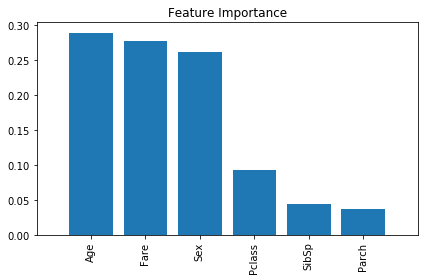

In [33]:
feature_evaluation(X_train,y_train,f_label)

In [50]:
# ロジスティック回帰
lr = LogisticRegression(penalty="l1",C=1)
lr.fit(X_train,y_train)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
def result_heatmap(Y_test,Y_pred):
    print(accuracy_score(Y_test, Y_pred))
    cm = confusion_matrix(Y_test, Y_pred)
    print(cm)
    sns.heatmap(cm,annot=True, cmap='Blues')

0.7832167832167832
[[75 11]
 [20 37]]


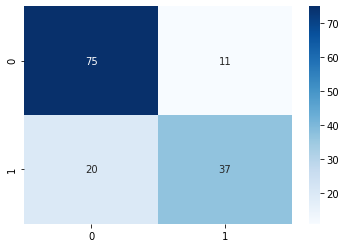

In [52]:
y_pred = lr.predict(X_test)
result_heatmap(y_test,y_pred)

## logistic
0.78くらい　あんまり

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty="l1",C=1,random_state=1) )
pipe_lr

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l1']},
              {'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l2']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7950963222416813
{'logisticregression__C': 100.0, 'logisticregression__penalty': 'l1'}


c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## gridsearchによるパラメータの最適化あと標準化
0.7950963222416813気持ち上がった
説明変数が足りていない気がする

## 欠損値補間